In [1]:
print("hello")

hello


In [2]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel("/home/lizard/Fatin/Projects/Pricing pipeline/data/project_inquiry_overview.xlsx")

In [4]:
df.head(5)

,date,location,typology,consultancy,scope,site_area,gfa,height,ar_fee,ar_rate,ls_fee,ls_rate
0,2022-05-18,"Bangkok, THAILAND",Residential (Blocks),AR,"CC, SD, DD",1604,9636,25,565250,58.7,NaN,NaN
1,2023-06-26,"Mumbai, INDIA",Residential (Towers),AR & LS,"CC, SD, DD",150970,120774,120,1810320,15.0,442300.0,2.9
2,2023-06-26,"Mumbai, INDIA",Residential (Towers),AR & LS,"CC, SD, DD",19686,86000,51,1337418,15.6,289714.0,14.7
3,2023-07-14,"Mumbai, INDIA",Hospitality (Clubhouse),AR & LS,"CC, SD, DD",30000,9290,10,551760,59.4,230860.0,7.7
4,2023-07-25,"Bali, INDONESIA",Residential (Blocks),AR & LS,"CC, SD, DD",29000,34800,15,986580,28.4,240640.0,8.3


## So the dataset has some important columns location, typology, scope, site_area, gfa, height
## The target columns are ar_fee or architecture fee and ls_fee or landscape fee. 
## Is ls_rate and ar_rate dependent on the target columns? Where do we get this information from??


In [5]:
df

,date,location,typology,consultancy,scope,site_area,gfa,height,ar_fee,ar_rate,ls_fee,ls_rate
0,2022-05-18,"Bangkok, THAILAND",Residential (Blocks),AR,"CC, SD, DD",1604,9636,25,565250,58.7,NaN,NaN
1,2023-06-26,"Mumbai, INDIA",Residential (Towers),AR & LS,"CC, SD, DD",150970,120774,120,1810320,15.0,442300.0,2.9
2,2023-06-26,"Mumbai, INDIA",Residential (Towers),AR & LS,"CC, SD, DD",19686,86000,51,1337418,15.6,289714.0,14.7
3,2023-07-14,"Mumbai, INDIA",Hospitality (Clubhouse),AR & LS,"CC, SD, DD",30000,9290,10,551760,59.4,230860.0,7.7
4,2023-07-25,"Bali, INDONESIA",Residential (Blocks),AR & LS,"CC, SD, DD",29000,34800,15,986580,28.4,240640.0,8.3
5,2023-07-25,"Bali, INDONESIA",Residential (Villas),AR & LS,"CC, SD, DD",121000,60500,10,1470150,24.3,341300.0,2.8
6,2023-08-17,"Hyderabad, INDIA",Hospitality (Clubhouse),AR,"CC, SD, DD",3500,6500,23,518000,79.7,NaN,NaN
7,2023-09-05,"Gurugram, INDIA",Residential (Towers),AR & LS,"CC, SD, DD",13866,50610,106,1225000,24.2,275000.0,19.8
8,2023-11-16,"Manila, PHILIPPINES","Residential (Blocks), Hospitality (Hotel Blocks)",AR & LS,"CC, SD, DD",12234,23692,25,675000,28.5,205000.0,16.8
9,2023-12-11,"Batam, INDONESIA",Hospitality (Resort),AR,"CC, SD, DD",47645,20625,90,785000,38.1,NaN,NaN


## The plan is to break location, typology, consultancy and scope into separate columns and find the corelation heatmap or something like this

In [6]:
# Split by '&' into two columns
df[["consultancy_1", "consultancy_2"]] = (
    df["consultancy"].str.split("&", n=1, expand=True)
)

# Strip spaces around the values
df["consultancy_1"] = df["consultancy_1"].str.strip()
df["consultancy_2"] = df["consultancy_2"].str.strip()

In [7]:
df

,date,location,typology,consultancy,scope,site_area,gfa,height,ar_fee,ar_rate,ls_fee,ls_rate,consultancy_1,consultancy_2
0,2022-05-18,"Bangkok, THAILAND",Residential (Blocks),AR,"CC, SD, DD",1604,9636,25,565250,58.7,NaN,NaN,AR,None
1,2023-06-26,"Mumbai, INDIA",Residential (Towers),AR & LS,"CC, SD, DD",150970,120774,120,1810320,15.0,442300.0,2.9,AR,LS
2,2023-06-26,"Mumbai, INDIA",Residential (Towers),AR & LS,"CC, SD, DD",19686,86000,51,1337418,15.6,289714.0,14.7,AR,LS
3,2023-07-14,"Mumbai, INDIA",Hospitality (Clubhouse),AR & LS,"CC, SD, DD",30000,9290,10,551760,59.4,230860.0,7.7,AR,LS
4,2023-07-25,"Bali, INDONESIA",Residential (Blocks),AR & LS,"CC, SD, DD",29000,34800,15,986580,28.4,240640.0,8.3,AR,LS
5,2023-07-25,"Bali, INDONESIA",Residential (Villas),AR & LS,"CC, SD, DD",121000,60500,10,1470150,24.3,341300.0,2.8,AR,LS
6,2023-08-17,"Hyderabad, INDIA",Hospitality (Clubhouse),AR,"CC, SD, DD",3500,6500,23,518000,79.7,NaN,NaN,AR,None
7,2023-09-05,"Gurugram, INDIA",Residential (Towers),AR & LS,"CC, SD, DD",13866,50610,106,1225000,24.2,275000.0,19.8,AR,LS
8,2023-11-16,"Manila, PHILIPPINES","Residential (Blocks), Hospitality (Hotel Blocks)",AR & LS,"CC, SD, DD",12234,23692,25,675000,28.5,205000.0,16.8,AR,LS
9,2023-12-11,"Batam, INDONESIA",Hospitality (Resort),AR,"CC, SD, DD",47645,20625,90,785000,38.1,NaN,NaN,AR,None


In [8]:
df_split = df["scope"].str.split(",", expand=True)

# Rename the new columns
df_split.columns = [f"scope{i+1}" for i in range(df_split.shape[1])]

# Strip spaces
df_split = df_split.apply(lambda x: x.str.strip())

# Merge back if needed
df = pd.concat([df, df_split], axis=1)



In [9]:
df

,date,location,typology,consultancy,scope,site_area,gfa,height,ar_fee,ar_rate,ls_fee,ls_rate,consultancy_1,consultancy_2,scope1,scope2,scope3
0,2022-05-18,"Bangkok, THAILAND",Residential (Blocks),AR,"CC, SD, DD",1604,9636,25,565250,58.7,NaN,NaN,AR,None,CC,SD,DD
1,2023-06-26,"Mumbai, INDIA",Residential (Towers),AR & LS,"CC, SD, DD",150970,120774,120,1810320,15.0,442300.0,2.9,AR,LS,CC,SD,DD
2,2023-06-26,"Mumbai, INDIA",Residential (Towers),AR & LS,"CC, SD, DD",19686,86000,51,1337418,15.6,289714.0,14.7,AR,LS,CC,SD,DD
3,2023-07-14,"Mumbai, INDIA",Hospitality (Clubhouse),AR & LS,"CC, SD, DD",30000,9290,10,551760,59.4,230860.0,7.7,AR,LS,CC,SD,DD
4,2023-07-25,"Bali, INDONESIA",Residential (Blocks),AR & LS,"CC, SD, DD",29000,34800,15,986580,28.4,240640.0,8.3,AR,LS,CC,SD,DD
5,2023-07-25,"Bali, INDONESIA",Residential (Villas),AR & LS,"CC, SD, DD",121000,60500,10,1470150,24.3,341300.0,2.8,AR,LS,CC,SD,DD
6,2023-08-17,"Hyderabad, INDIA",Hospitality (Clubhouse),AR,"CC, SD, DD",3500,6500,23,518000,79.7,NaN,NaN,AR,None,CC,SD,DD
7,2023-09-05,"Gurugram, INDIA",Residential (Towers),AR & LS,"CC, SD, DD",13866,50610,106,1225000,24.2,275000.0,19.8,AR,LS,CC,SD,DD
8,2023-11-16,"Manila, PHILIPPINES","Residential (Blocks), Hospitality (Hotel Blocks)",AR & LS,"CC, SD, DD",12234,23692,25,675000,28.5,205000.0,16.8,AR,LS,CC,SD,DD
9,2023-12-11,"Batam, INDONESIA",Hospitality (Resort),AR,"CC, SD, DD",47645,20625,90,785000,38.1,NaN,NaN,AR,None,CC,SD,DD


In [10]:
# Split into city and country
df[["city", "country"]] = df["location"].str.split(",", n=1, expand=True)

# Strip whitespace
df["city"] = df["city"].str.strip()
df["country"] = df["country"].str.strip()

In [11]:
# Extract main and sub using regex
df["typology_main"] = df["typology"].str.extract(r'^(.*?)\s*\(')[0].fillna(df["typology"])
df["typology_sub"] = df["typology"].str.extract(r'\((.*?)\)')[0]

In [12]:
df.head(19)

,date,location,typology,consultancy,scope,site_area,gfa,height,ar_fee,ar_rate,...,ls_rate,consultancy_1,consultancy_2,scope1,scope2,scope3,city,country,typology_main,typology_sub
0,2022-05-18,"Bangkok, THAILAND",Residential (Blocks),AR,"CC, SD, DD",1604,9636,25,565250,58.7,...,NaN,AR,None,CC,SD,DD,Bangkok,THAILAND,Residential,Blocks
1,2023-06-26,"Mumbai, INDIA",Residential (Towers),AR & LS,"CC, SD, DD",150970,120774,120,1810320,15.0,...,2.9,AR,LS,CC,SD,DD,Mumbai,INDIA,Residential,Towers
2,2023-06-26,"Mumbai, INDIA",Residential (Towers),AR & LS,"CC, SD, DD",19686,86000,51,1337418,15.6,...,14.7,AR,LS,CC,SD,DD,Mumbai,INDIA,Residential,Towers
3,2023-07-14,"Mumbai, INDIA",Hospitality (Clubhouse),AR & LS,"CC, SD, DD",30000,9290,10,551760,59.4,...,7.7,AR,LS,CC,SD,DD,Mumbai,INDIA,Hospitality,Clubhouse
4,2023-07-25,"Bali, INDONESIA",Residential (Blocks),AR & LS,"CC, SD, DD",29000,34800,15,986580,28.4,...,8.3,AR,LS,CC,SD,DD,Bali,INDONESIA,Residential,Blocks
5,2023-07-25,"Bali, INDONESIA",Residential (Villas),AR & LS,"CC, SD, DD",121000,60500,10,1470150,24.3,...,2.8,AR,LS,CC,SD,DD,Bali,INDONESIA,Residential,Villas
6,2023-08-17,"Hyderabad, INDIA",Hospitality (Clubhouse),AR,"CC, SD, DD",3500,6500,23,518000,79.7,...,NaN,AR,None,CC,SD,DD,Hyderabad,INDIA,Hospitality,Clubhouse
7,2023-09-05,"Gurugram, INDIA",Residential (Towers),AR & LS,"CC, SD, DD",13866,50610,106,1225000,24.2,...,19.8,AR,LS,CC,SD,DD,Gurugram,INDIA,Residential,Towers
8,2023-11-16,"Manila, PHILIPPINES","Residential (Blocks), Hospitality (Hotel Blocks)",AR & LS,"CC, SD, DD",12234,23692,25,675000,28.5,...,16.8,AR,LS,CC,SD,DD,Manila,PHILIPPINES,Residential,Blocks
9,2023-12-11,"Batam, INDONESIA",Hospitality (Resort),AR,"CC, SD, DD",47645,20625,90,785000,38.1,...,NaN,AR,None,CC,SD,DD,Batam,INDONESIA,Hospitality,Resort


## Dropping the columns that are not necessary now which are location, consultancy, scope and typology

In [13]:
df =df.drop(columns=['location', "typology", "scope", "consultancy"], axis=1)

In [14]:
df

,date,site_area,gfa,height,ar_fee,ar_rate,ls_fee,ls_rate,consultancy_1,consultancy_2,scope1,scope2,scope3,city,country,typology_main,typology_sub
0,2022-05-18,1604,9636,25,565250,58.7,NaN,NaN,AR,None,CC,SD,DD,Bangkok,THAILAND,Residential,Blocks
1,2023-06-26,150970,120774,120,1810320,15.0,442300.0,2.9,AR,LS,CC,SD,DD,Mumbai,INDIA,Residential,Towers
2,2023-06-26,19686,86000,51,1337418,15.6,289714.0,14.7,AR,LS,CC,SD,DD,Mumbai,INDIA,Residential,Towers
3,2023-07-14,30000,9290,10,551760,59.4,230860.0,7.7,AR,LS,CC,SD,DD,Mumbai,INDIA,Hospitality,Clubhouse
4,2023-07-25,29000,34800,15,986580,28.4,240640.0,8.3,AR,LS,CC,SD,DD,Bali,INDONESIA,Residential,Blocks
5,2023-07-25,121000,60500,10,1470150,24.3,341300.0,2.8,AR,LS,CC,SD,DD,Bali,INDONESIA,Residential,Villas
6,2023-08-17,3500,6500,23,518000,79.7,NaN,NaN,AR,None,CC,SD,DD,Hyderabad,INDIA,Hospitality,Clubhouse
7,2023-09-05,13866,50610,106,1225000,24.2,275000.0,19.8,AR,LS,CC,SD,DD,Gurugram,INDIA,Residential,Towers
8,2023-11-16,12234,23692,25,675000,28.5,205000.0,16.8,AR,LS,CC,SD,DD,Manila,PHILIPPINES,Residential,Blocks
9,2023-12-11,47645,20625,90,785000,38.1,NaN,NaN,AR,None,CC,SD,DD,Batam,INDONESIA,Hospitality,Resort


In [15]:
# Columns to encode
cols_to_encode = ["consultancy_1", "consultancy_2", "scope1", "scope2", "scope3" ,"typology_sub", "typology_main", "country", "city"]
df[cols_to_encode] = df[cols_to_encode].fillna("None")

# Encode
oe = OrdinalEncoder()
df[[col + "_encoded" for col in cols_to_encode]] = oe.fit_transform(df[cols_to_encode])

In [16]:
df = df.drop(columns=["consultancy_1", "consultancy_2", "scope1", "scope2", "scope3" ,"typology_sub", "typology_main", "country", "city"], axis=1)

In [17]:
df

,date,site_area,gfa,height,ar_fee,ar_rate,ls_fee,ls_rate,consultancy_1_encoded,consultancy_2_encoded,scope1_encoded,scope2_encoded,scope3_encoded,typology_sub_encoded,typology_main_encoded,country_encoded,city_encoded
0,2022-05-18,1604,9636,25,565250,58.7,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
1,2023-06-26,150970,120774,120,1810320,15.0,442300.0,2.9,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,9.0
2,2023-06-26,19686,86000,51,1337418,15.6,289714.0,14.7,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,9.0
3,2023-07-14,30000,9290,10,551760,59.4,230860.0,7.7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0
4,2023-07-25,29000,34800,15,986580,28.4,240640.0,8.3,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0
5,2023-07-25,121000,60500,10,1470150,24.3,341300.0,2.8,0.0,0.0,0.0,0.0,0.0,6.0,2.0,1.0,1.0
6,2023-08-17,3500,6500,23,518000,79.7,NaN,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0
7,2023-09-05,13866,50610,106,1225000,24.2,275000.0,19.8,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,5.0
8,2023-11-16,12234,23692,25,675000,28.5,205000.0,16.8,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,8.0
9,2023-12-11,47645,20625,90,785000,38.1,NaN,NaN,0.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,3.0


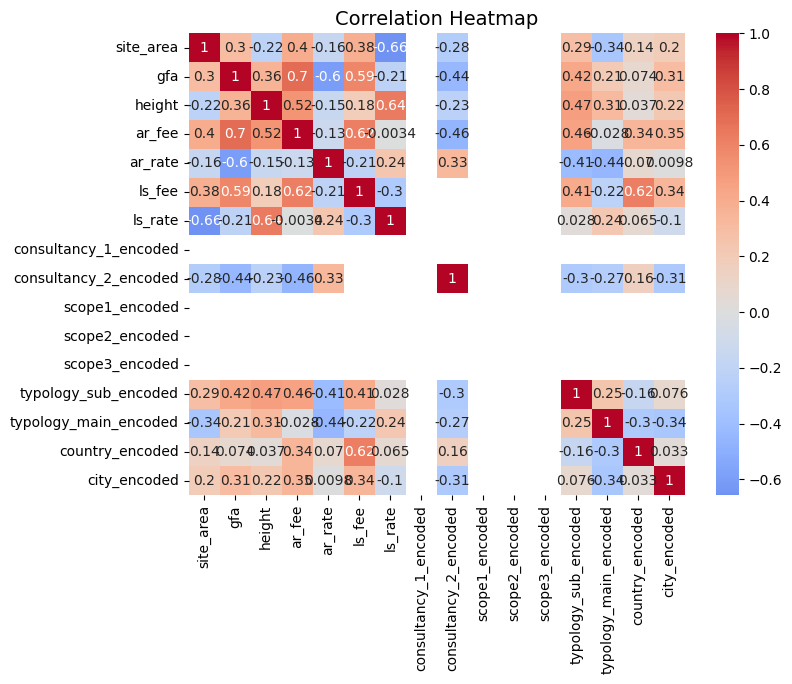

In [18]:
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

In [19]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# --------------------------
y = df['ar_fee']

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
X = df.drop(columns=["date", "ar_fee", "ar_rate", "ls_fee", "ls_rate"], axis=1)

In [22]:
X

,site_area,gfa,height,consultancy_1_encoded,consultancy_2_encoded,scope1_encoded,scope2_encoded,scope3_encoded,typology_sub_encoded,typology_main_encoded,country_encoded,city_encoded
0,1604,9636,25,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
1,150970,120774,120,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,9.0
2,19686,86000,51,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,9.0
3,30000,9290,10,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0
4,29000,34800,15,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0
5,121000,60500,10,0.0,0.0,0.0,0.0,0.0,6.0,2.0,1.0,1.0
6,3500,6500,23,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0
7,13866,50610,106,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,5.0
8,12234,23692,25,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,8.0
9,47645,20625,90,0.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,3.0


In [23]:
scaler = MinMaxScaler()


In [24]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# --------------------------
# 1. Load dataset (example: California housing)
# --------------------------
#X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --------------------------
# 2. Define base regressors
# --------------------------
base_learners = [
    ("rf", RandomForestRegressor(n_estimators=100, random_state=42)),
    ("gbr", GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ("svr", SVR(kernel="rbf", C=100, gamma="scale"))
]

# --------------------------
# 3. Define meta-learner (stacking final estimator)
# --------------------------
meta_learner = RidgeCV()  # could also use LinearRegression, Lasso, etc.

# --------------------------
# 4. Build stacking ensemble
# --------------------------
stacked_reg = StackingRegressor(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5,                # cross-validation inside stacking
    n_jobs=-1,           # parallel jobs
    passthrough=False    # if True, meta-learner also gets original features
)

# --------------------------
# 5. Train & evaluate
# --------------------------
stacked_reg.fit(X_train, y_train)
y_pred = stacked_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Stacking Ensemble RMSE: {rmse:.4f}")

# --------------------------
# 6. Compare with individual models
# --------------------------
for name, model in base_learners:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    rmse_ind = np.sqrt(mean_squared_error(y_test, pred))
    print(f"{name} RMSE: {rmse_ind:.4f}")


Stacking Ensemble RMSE: 1126151.1443
rf RMSE: 1154053.8257
gbr RMSE: 1192657.8961
svr RMSE: 1185055.8842


In [25]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import TransformedTargetRegressor

# --------------------------
# 1. Load dataset
# --------------------------


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --------------------------
# 2. Define base learners
# --------------------------
base_learners = [
    ("rf", RandomForestRegressor(n_estimators=100, random_state=42)),
    ("gbr", GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ("svr", SVR(kernel="rbf", C=100, gamma="scale"))
]

# --------------------------
# 3. Meta learner
# --------------------------
meta_learner = RidgeCV()

# --------------------------
# 4. Stacking regressor
# --------------------------
stacked_reg = StackingRegressor(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5,
    n_jobs=-1
)

# --------------------------
# 5. Wrap with TransformedTargetRegressor to scale y
# --------------------------
stacked_with_scaling = TransformedTargetRegressor(
    regressor=stacked_reg,
    transformer=MinMaxScaler()
)

# --------------------------
# 6. Train & evaluate
# --------------------------
stacked_with_scaling.fit(X_train, y_train)
y_pred = stacked_with_scaling.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Stacking Ensemble with y MinMax Scaling RMSE: {rmse:.4f}")


Stacking Ensemble with y MinMax Scaling RMSE: 1080840.1989


In [26]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import MinMaxScaler

# Wrap each base model with TransformedTargetRegressor (for fair comparison)
wrapped_base_learners = [
    (name, TransformedTargetRegressor(regressor=model, transformer=MinMaxScaler()))
    for name, model in base_learners
]

# Train and evaluate each individually
for name, model in wrapped_base_learners:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    rmse_ind = np.sqrt(mean_squared_error(y_test, pred))
    print(f"{name} RMSE: {rmse_ind:.4f}")


rf RMSE: 1153649.2022
gbr RMSE: 1193578.6577
svr RMSE: 839847.6997


In [27]:
import numpy as np
import warnings
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Models
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV, BayesianRidge
from sklearn.svm import SVR
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
)
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

warnings.filterwarnings("ignore")  # silence convergence warnings

# --------------------------
# 1. Load dataset
# --------------------------
#X, y = fetch_california_housing(return_X_y=True, as_frame=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --------------------------
# 2. Define candidate regressors
# --------------------------
regressors = [
    ("LinearRegression", LinearRegression()),
    ("RidgeCV", RidgeCV()),
    ("LassoCV", LassoCV(cv=5)),
    ("ElasticNetCV", ElasticNetCV(cv=5)),
    ("BayesianRidge", BayesianRidge()),
    ("SVR_rbf", SVR(kernel="rbf", C=100, gamma="scale")),
    ("DecisionTree", DecisionTreeRegressor(random_state=42)),
    ("RandomForest", RandomForestRegressor(n_estimators=100, random_state=42)),
    ("ExtraTrees", ExtraTreesRegressor(n_estimators=100, random_state=42)),
    ("GradientBoosting", GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ("AdaBoost", AdaBoostRegressor(n_estimators=100, random_state=42)),
    ("KNeighbors", KNeighborsRegressor(n_neighbors=5)),
    ("MLP", MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42))
]

# --------------------------
# 3. Train & evaluate each with MinMax scaling on y
# --------------------------
results = {}

for name, model in regressors:
    wrapped = TransformedTargetRegressor(
        regressor=model, transformer=MinMaxScaler()
    )
    wrapped.fit(X_train, y_train)
    pred = wrapped.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    results[name] = rmse
    print(f"{name:<20} RMSE: {rmse:.4f}")

# --------------------------
# 4. Compare best model
# --------------------------
best_model = min(results, key=results.get)
print("\nBest model:", best_model, "with RMSE =", results[best_model])


LinearRegression     RMSE: 1047621.0023
RidgeCV              RMSE: 1093323.3161
LassoCV              RMSE: 1124442.6188
ElasticNetCV         RMSE: 1124442.6179
BayesianRidge        RMSE: 1024106.6632
SVR_rbf              RMSE: 839847.6997
DecisionTree         RMSE: 1094450.4157
RandomForest         RMSE: 1153649.2022
ExtraTrees           RMSE: 1035512.8765
GradientBoosting     RMSE: 1193578.6577
AdaBoost             RMSE: 1242685.6538
KNeighbors           RMSE: 1010675.1436
MLP                  RMSE: 1910438781.5519

Best model: SVR_rbf with RMSE = 839847.6996897231


## Test all the models with Noise Injection Synthetic Data Generation

In [28]:
import numpy as np
import pandas as pd
import warnings
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Models
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV, BayesianRidge
from sklearn.svm import SVR
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
)
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

warnings.filterwarnings("ignore")

# --------------------------
# 1. Load dataset
# --------------------------


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --------------------------
# 2. Synthetic data generation (noise injection)
# --------------------------
def generate_synthetic_data(X, y, num_samples=10000, noise_level=0.01, target_noise=0.01):
    rng = np.random.default_rng(42)
    
    # Randomly pick rows
    idx = rng.integers(0, len(X), size=num_samples)
    X_base = X.iloc[idx].to_numpy()
    y_base = y.iloc[idx].to_numpy()
    
    # Add Gaussian noise
    X_syn = X_base + rng.normal(0, noise_level * X.std().to_numpy(), X_base.shape)
    y_syn = y_base + rng.normal(0, target_noise * y.std(), y_base.shape)
    
    return pd.DataFrame(X_syn, columns=X.columns), pd.Series(y_syn)

# Generate synthetic samples
X_syn, y_syn = generate_synthetic_data(X_train, y_train, num_samples=10000)

# Augment training data
X_train_aug = pd.concat([X_train, X_syn], axis=0).reset_index(drop=True)
y_train_aug = pd.concat([y_train, y_syn], axis=0).reset_index(drop=True)

print("Original training size:", X_train.shape)
print("Augmented training size:", X_train_aug.shape)

# --------------------------
# 3. Define regressors
# --------------------------
regressors = [
    ("LinearRegression", LinearRegression()),
    ("RidgeCV", RidgeCV()),
    ("LassoCV", LassoCV(cv=5)),
    ("ElasticNetCV", ElasticNetCV(cv=5)),
    ("BayesianRidge", BayesianRidge()),
    ("SVR_rbf", SVR(kernel="rbf", C=100, gamma="scale")),
    
    ("DecisionTree", DecisionTreeRegressor(random_state=42)),
    ("RandomForest", RandomForestRegressor(n_estimators=100, random_state=42)),
    ("ExtraTrees", ExtraTreesRegressor(n_estimators=100, random_state=42)),
    ("GradientBoosting", GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ("AdaBoost", AdaBoostRegressor(n_estimators=100, random_state=42)),
    ("KNeighbors", KNeighborsRegressor(n_neighbors=5)),
    ("MLP", MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42))
]

# --------------------------
# 4. Train & evaluate with MinMax scaling on y
# --------------------------
results = {}

for name, model in regressors:
    wrapped = TransformedTargetRegressor(
        regressor=model, transformer=MinMaxScaler()
    )
    wrapped.fit(X_train_aug, y_train_aug)  # use augmented training data
    pred = wrapped.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    results[name] = rmse
    print(f"{name:<20} RMSE: {rmse:.4f}")

# --------------------------
# 5. Best model
# --------------------------
best_model = min(results, key=results.get)
print("\nBest model after augmentation:", best_model, "with RMSE =", results[best_model])


Original training size: (18, 12)
Augmented training size: (10018, 12)
LinearRegression     RMSE: 1043984.6553
RidgeCV              RMSE: 1039692.6316
LassoCV              RMSE: 1122628.1694
ElasticNetCV         RMSE: 1122628.1684
BayesianRidge        RMSE: 1044570.6570
SVR_rbf              RMSE: 956559.5900
DecisionTree         RMSE: 1101351.8933
RandomForest         RMSE: 1146810.9784
ExtraTrees           RMSE: 1038659.8728
GradientBoosting     RMSE: 1213640.1447
AdaBoost             RMSE: 1262051.5426
KNeighbors           RMSE: 1005492.6347
MLP                  RMSE: 279738338.6682

Best model after augmentation: SVR_rbf with RMSE = 956559.5900343666
